# Old World Simulation



In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import world, analysis, parameters
import copy

In [2]:
def simulation(map_, n_sim):
    imperial_density = []
    
    for sim in range(n_sim):
        map_.reset()
        imperial_density.append(analysis.ImperialDensity(map_))
        for step in range(1500):
            map_.step()
            imperial_density[sim].sample()
            if (map_.step_number)%100 == 0:
                print('simulation: {:2d}\tstep: {:4d}'.format(sim+1,map_.step_number))
            
    return imperial_density

In [4]:
# Use default parameters
params = parameters.defaults

map_ = world.World(params=params, from_file=project_dir+'/data/old_world.yml')

# Check if simulation has been run before
if os.path.isfile('./imperial_density.pkl'):
    mean_impd = analysis.ImperialDensity.from_file(map_, './imperial_density.pkl')
else:
    imperial_density = simulation(map_, 20)
    mean_impd = analysis.ImperialDensity.mean(imperial_density)
    mean_impd.dump('./imperial_density.pkl')

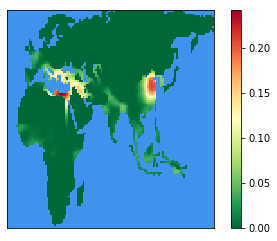

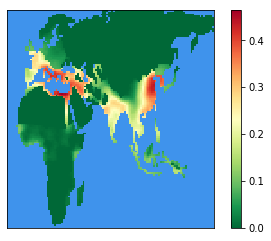

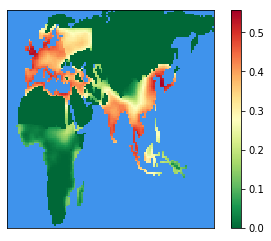

In [5]:
mean_impd.plot_all()

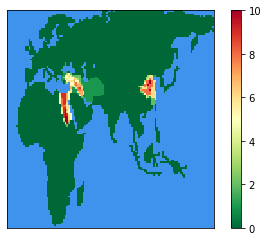

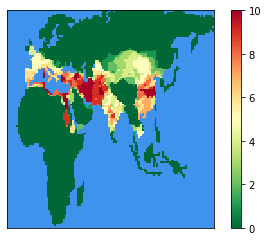

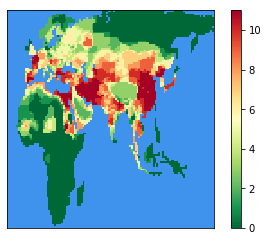

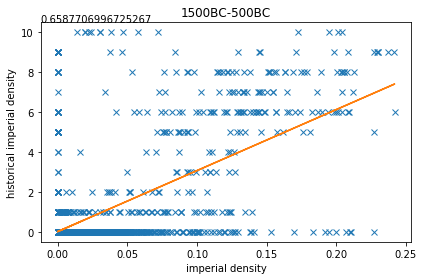

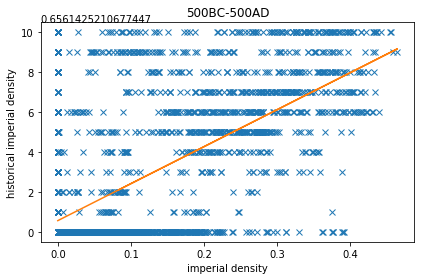

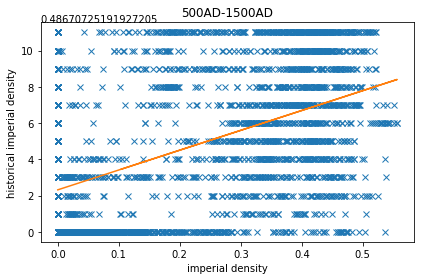

In [6]:
# Correlate with historical data
historical = analysis.HistoricalImperialDensity(map_, data_file=project_dir+'/data/imperial_density_data.pkl')

historical.plot_heatmap()

historical.correlate(mean_impd)